## Importing necessary packages 

In [2]:
# pandas for Data analysis and Data manupulation
import pandas as pd
# numpy for mathematical operations
import numpy as np
#import warnings for filtering warnings
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## First Data

In [3]:
# loading the first data set (gross_dataset)
data = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Data Understanding

In [4]:
# describe to give us the summary statistics for numerical columns
data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
# info for description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Studio, domestic_gross and foreign_gross columns has missing values and foreign_gross has string values instead of integers.

In [6]:
# shape to find number of rows and columns
data.shape

(3387, 5)

The dataset has a total 3387 rows and 5 columns.

In [7]:
# head to find the first 5 rows of our dataset
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
# tail to find the last rows of our dataset
data.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


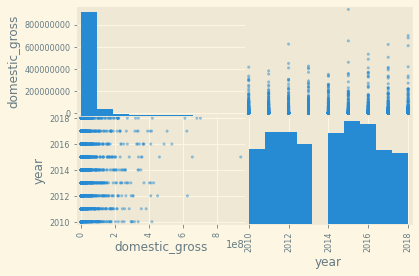

In [9]:
# Relationship between the variables
plt.style.use('Solarize_Light2')
pd.plotting.scatter_matrix(data);

### Data Preparation/ Cleaning

####  Null Values  and Missing Values

In [10]:
# Checking for Null Values
data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# Null Values in percentages
null_perct = (data.isna().sum())/len(data)
null_perct

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [12]:
# checking the unique values in foreign_gross column
data.foreign_gross.unique()

array(['652000000', '691300000', '664300000', ..., '530000', '256000',
       '30000'], dtype=object)

In [13]:
# removing the special caracter and changing the foreign_gross column into a float
data['foreign_gross'] = data['foreign_gross'].str.replace(',','').astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Mean of foreign_gross: 74872810.15046637
Median of foreign_gross: 18700000.0


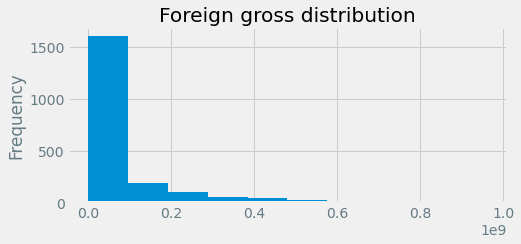

In [15]:
# Dealing with Foreign_gross Nan Values
plt.style.use('fivethirtyeight')
ax = data['foreign_gross'].plot(kind = 'hist',bins = 10, figsize = (7,3))
ax.set_title('Foreign gross distribution')
ax;
print('Mean of foreign_gross:', data['foreign_gross'].mean())
print('Median of foreign_gross:', data['foreign_gross'].median())


The distribution of foreign gross is positively skewed hence we will use median to replace the nan values.

In [16]:
# Replacing the nan values in foreign_gross with the median
data['foreign_gross'] = data['foreign_gross'].fillna(value = data['foreign_gross'].median())

In [17]:
# Confirming the changes made
data.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

Mean of domestic_gross: 28745845.06698422
Median of domestic_gross: 1400000.0


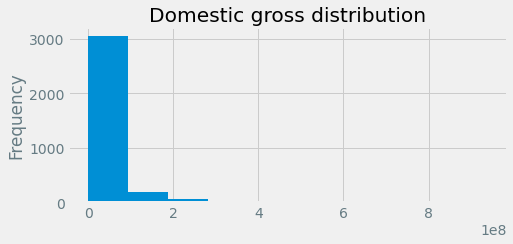

In [18]:
# Dealing with the missing values for domestic_gross
plt.style.use('fivethirtyeight')
ax = data['domestic_gross'].plot(kind = 'hist',bins = 10, figsize = (7,3))
ax.set_title('Domestic gross distribution')
ax;
print('Mean of domestic_gross:', data['domestic_gross'].mean())
print('Median of domestic_gross:', data['domestic_gross'].median())

The distribution of domestic gross is positively skewed. We can use median instead of mean.

In [19]:
# Replacing the nan values in domestic_gross with the median
data['domestic_gross'] = data['domestic_gross'].fillna(value = data['domestic_gross'].median())

In [20]:
# Confirming the changes made
data.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [21]:
# Dealing with studio missing values 
data = data.dropna()

Dropped the rows with nan values since they were a few.

In [22]:
# confirm for the changes
data.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
# Checking if there is missing values in the placeholders
for i in ['studio', 'domestic_gross', 'foreign_gross', 'year']:
    print('Values for {}:{}\n'.format(i, data[i].unique()))

Values for studio:['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 'AF' 'TFA' 'Myr.'
 'BM&DH' 'SEG' 'PalT' 'Outs' 'OutF' 'BSM' 'WAMCR' 'PM&E' 'A24' 'Cdgm.'
 'Distrib.' 'Imax' 'PH' 'HTR' 'ELS' 'PI' 'E1' 'TV

No missing values denoted by placeholders

#### Duplicates

In [24]:
# checking for duplicates in our dataset
dup_data = data.duplicated().any()
dup_data

False

There is no duplicate values in our dataset

#### Outliers

In [25]:
# define a function for Boxplot to check for outliers
def plot_boxplot(df, col):
    data.boxplot(column = [col])
    plt.grid(False)
    plt.show()

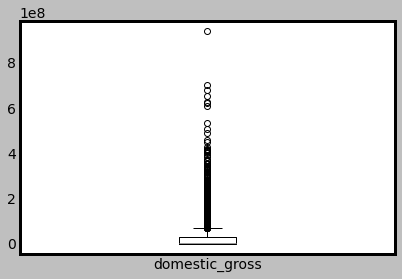

In [26]:
# Boxplot for Domestic Gross Distribution
plt.style.use('grayscale')
plot_boxplot(data,'domestic_gross')

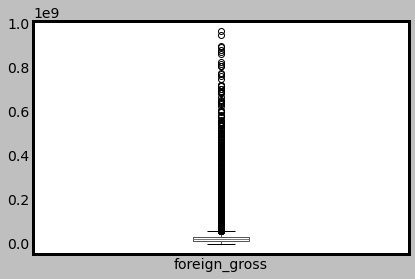

In [27]:
# Boxplot for Domestic Foreign Distribution
plt.style.use('seaborn-colorblind')
plot_boxplot(data,'foreign_gross')

In [28]:
# define a function that will return index of outliers
# IQR Interquartile range = Q3-Q1

def outliers (df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    
    ls = df.index[ (df[col] < lower_bound) | (df[col] > upper_bound)]
    return ls


In [29]:
# list of output indices in Domestic_gross
index_list = []
for feature1 in ['domestic_gross']:
    index_list.extend(outliers(data, feature1))

In [30]:
len(index_list)

3382

In [31]:
# list of output indices in Domestic_gross
index_list = []
for feature2 in ['foreign_gross']:
    index_list.extend(outliers(data, feature2))

In [32]:
len(index_list)

2919

In both columns (Domestic_gross and Foereign_gross) are 3377 and 3378 respectively are almost equal to total data 3387. Hence we retain the outliers.

In [33]:
# final clean data
clean_data = data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


### Univariate Analysis and Bivariate Analysis

In [34]:
# Total Gross
clean_data['total_gross'] = clean_data['domestic_gross'] + clean_data['foreign_gross']
clean_data.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [35]:
clean_data['studio'].value_counts()

IFC          166
Uni.         147
WB           140
Fox          136
Magn.        136
            ... 
Linn           1
Jampa          1
MUBI           1
JS             1
Spanglish      1
Name: studio, Length: 257, dtype: int64

In [36]:
studio_gross = clean_data.groupby('studio')['total_gross'].sum().sort_values(ascending = False).head()
studio_gross

studio
BV      4.425028e+10
Fox     3.104277e+10
WB      3.102295e+10
Uni.    2.981326e+10
Sony    2.248124e+10
Name: total_gross, dtype: float64

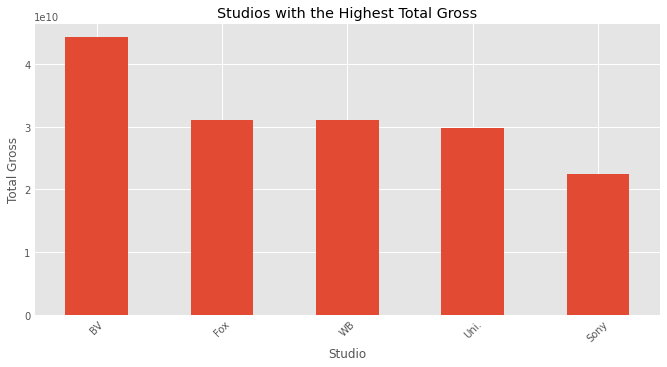

In [37]:
#plotting studios with the highest domestic_gross
plt.style.use('ggplot')
ax =studio_gross.plot(kind = 'bar',figsize = (10, 5),  width = 0.5)
ax.set_title('Studios with the Highest Total Gross')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Gross')
plt.xticks(rotation= 45)
ax;

BV studio have the highest total gross, Microsoft should consider investing in BV studio.

### SECOND DATA

In [38]:
# loading the first data set (tmbd dataset)
tmbd = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmbd

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [39]:
tmbd.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

#### Drop Unnecessary Columns 

In [40]:
tmbd.drop('Unnamed: 0', axis = 1, inplace = True)

In [41]:
tmbd.drop('genre_ids', axis = 1, inplace = True)

In [42]:
tmbd.head()

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Data Understanding

In [43]:
# describe to give us the summary statistics for numerical columns
tmbd.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [44]:
# info for description of the data
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26517 non-null  int64  
 1   original_language  26517 non-null  object 
 2   original_title     26517 non-null  object 
 3   popularity         26517 non-null  float64
 4   release_date       26517 non-null  object 
 5   title              26517 non-null  object 
 6   vote_average       26517 non-null  float64
 7   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


Dataset does not contain any missing values

In [45]:
# shape to find number of rows and columns
tmbd.shape

(26517, 8)

Dataset contains 26517 rows and 10 columns

In [46]:
# head to find the first 5 rows of our dataset
tmbd.head()

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [47]:
# tail to find the last rows of our dataset
tmbd.tail()

,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


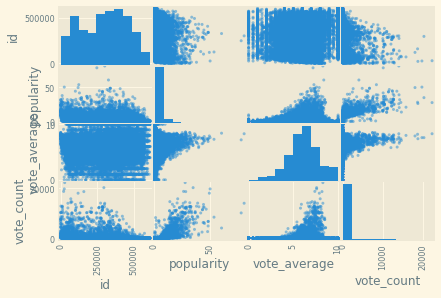

In [48]:
# Relationship between the variables
plt.style.use('Solarize_Light2')
pd.plotting.scatter_matrix(tmbd);

### Data Preparation/ Cleaning

####  Null Values  and Missing Values

In [49]:
# Checking for Null Values
tmbd.isna().sum()

id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The dataset does not contain any missing values.

#### Duplicates

In [50]:
# checking for duplicates in our dataset
dup_tmbd = tmbd.duplicated().any()
dup_tmbd

True

The dataset does not contain any duplicate values.

#### Outliers

In [51]:
# define a function for Boxplot to check for outliers
def plot_boxplot(val, col):
    tmbd.boxplot(column = [col])
    plt.grid(False)
    plt.show()

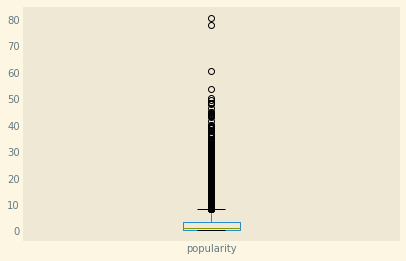

In [52]:
# Boxplot for Population
plt.style.use('_classic_test_patch')
plot_boxplot(tmbd,'popularity')

In [53]:
# list of output indices in Popularity
index_list = []
for pop in ['popularity']:
    index_list.extend(outliers(tmbd, pop))

In [54]:
len(index_list)

26517

In [55]:
# percentage of popularity outliers in %
perct = len(index_list)/ len(tmbd)*100
perct

100.0

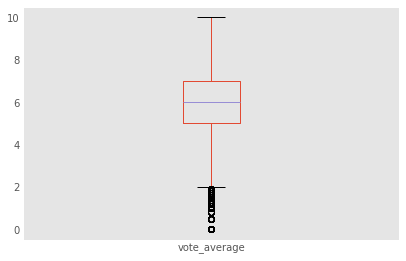

In [56]:
# Boxplot for Vote Average
plt.style.use('ggplot')
plot_boxplot(tmbd,'vote_average')

In [57]:
# list of output indices in Vote Average
index_list = []
for vote in ['vote_average']:
    index_list.extend(outliers(tmbd, vote))

In [58]:
len(index_list)

23550

In [59]:
# percentage of vote_average outliers in %
perct = len(index_list)/ len(tmbd)*100
perct

88.81095146509786

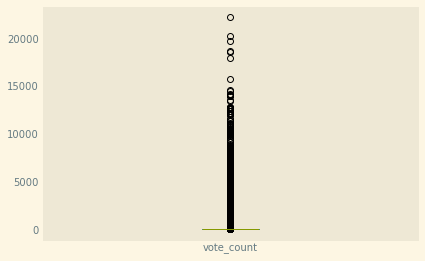

In [60]:
# Boxplot for Vote Count
plt.style.use('Solarize_Light2')
plot_boxplot(tmbd,'vote_count')

In [61]:
# list of output indices in Vote Count
index_list = []
for count in ['vote_count']:
    index_list.extend(outliers(tmbd, count))

In [62]:
len(index_list)

26517

In [63]:
# percentage of vote_average outliers in %
perct = len(index_list)/ len(tmbd)*100
perct

100.0

All the boxplots have high percentage of outliers thus we cannot remove the outliers.

### Bivariate Analysis

When the Vote Average increase the Vote count increases.

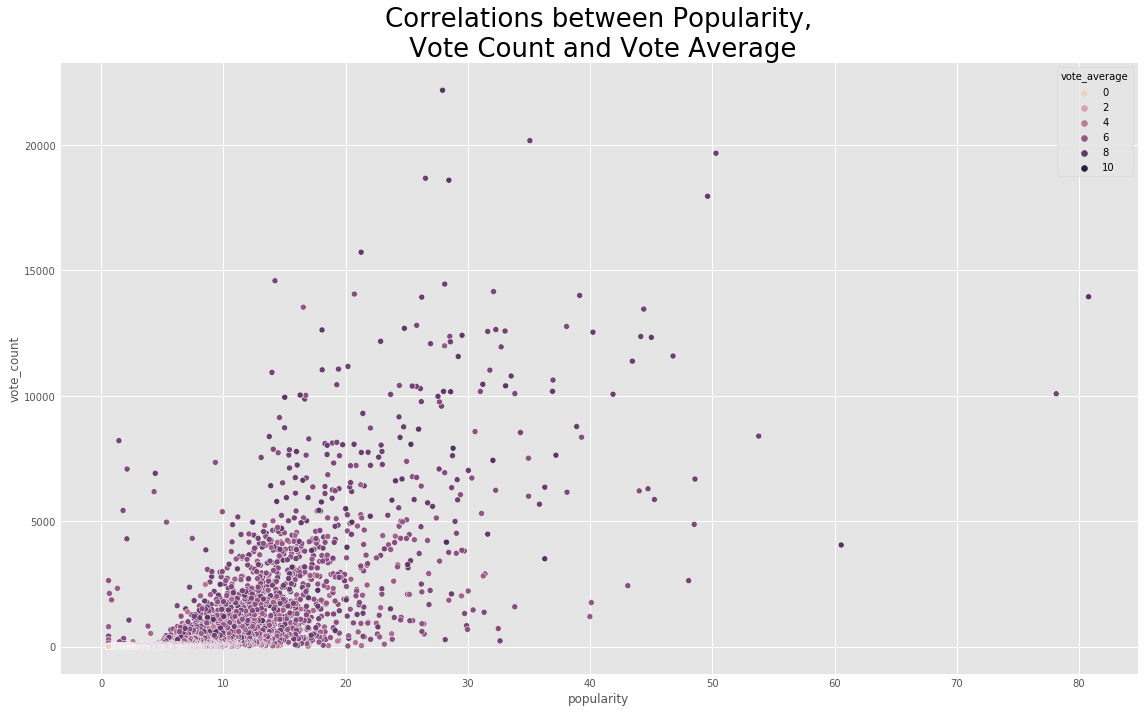

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='popularity', y='vote_count', data = tmbd, hue='vote_average')
plt.title("Correlations between Popularity,\n Vote Count and Vote Average", fontsize=26)
plt.tight_layout()
plt.show() 

There is a positive corelation between Popularity, Vote Count and Vote Average.

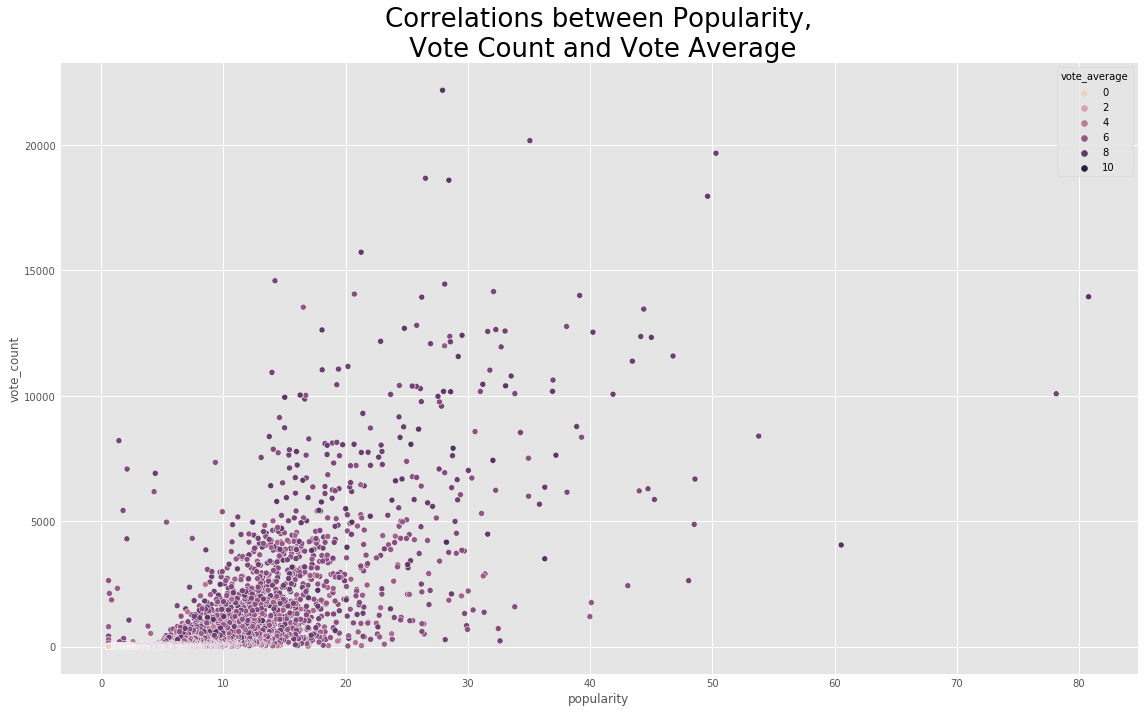

In [65]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='popularity', y='vote_count', data = tmbd, hue='vote_average')
plt.title("Correlations between Popularity,\n Vote Count and Vote Average", fontsize=26)
plt.tight_layout()
plt.show() 